In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2021-11-12 19:02:40--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-11-12 19:02:41--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://jztkft.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-11-12 19:02:41--  http://jztkft.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving jztkft.dl.sourcef

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 17.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=4d7e255bfb45bd69ec821ffcd6c9070e3f5a02ce458c23d4afd5a613a9d63718
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
import talib as ta

In [4]:
symbol = 'JPPOWER.NS'
start = '2019-11-12'
end = '2021-11-11'
df = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [7]:
def VWAP(df):
    return (df['Adj Close'] * df['Volume']).sum() / df['Volume'].sum()

In [8]:
n = 14
df['VWAP'] = pd.concat([(pd.Series(VWAP(df.iloc[i:i+n]), index=[df.index[i+n]])) for i in range(len(df)-n)])

In [9]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,VWAP
Date,,,,,,,
2019-12-03,1.35,1.35,1.35,1.35,1.35,327490,1.098365
2019-12-04,1.40,1.40,1.40,1.40,1.40,1547046,1.105730
2019-12-05,1.45,1.45,1.45,1.45,1.45,319927,1.111852
2019-12-06,1.50,1.50,1.50,1.50,1.50,656564,1.112970
2019-12-09,1.55,1.55,1.45,1.45,1.45,10826634,1.120692


No handles with labels found to put in legend.


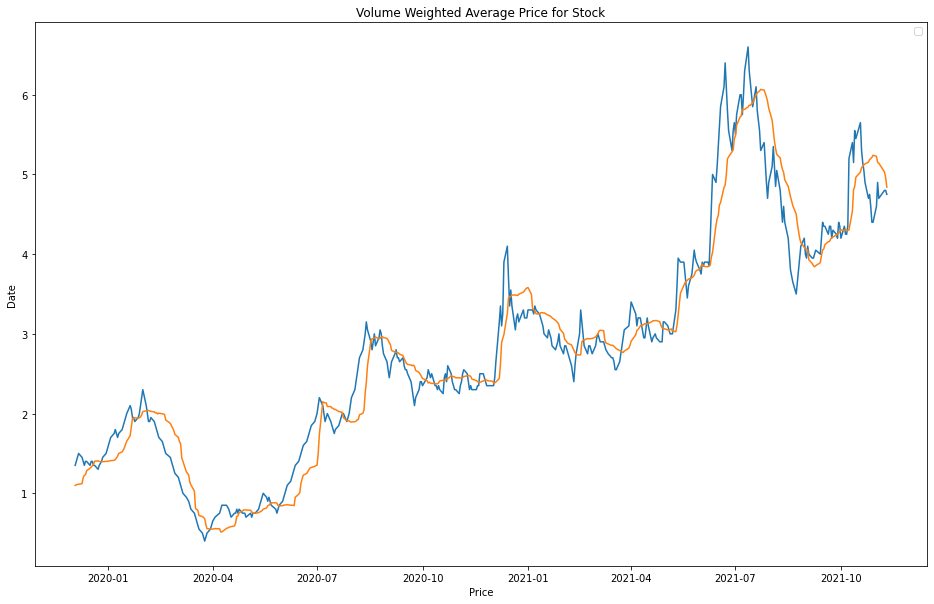

In [10]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['VWAP'])
plt.title('Volume Weighted Average Price for Stock')
plt.legend(loc='best')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()